<a href="https://colab.research.google.com/github/Anastasiamay/Study_projects/blob/main/business_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

# Описание проекта
Для анализа предоставлен датасет, содержащий информацию о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Информация охватывает данные о посещении развлекательного приложения Procrastinate Pro+, покупки пользователей, расходы на рекламу. Последнее время компания терпит убытки, но при этом вкладывает большие деньги в рекламу.

**Цель:** Установить причины убытков и дать рекомендации по повышению прибыли компании.

**Краткий план исследования**:
* Изучить общую информацию
* Подготовить данные для дальнейшего исследования
* Провести исследовательский анализ данных
* Провести маркетинговый анализ
* Исследовать окупаемость рекламы

### Загрузка данных и подготовка их к анализу

In [71]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [72]:
!gdown --id 175I9Fmjwf0V2mc2FvQYfRi8Xfm0Rre1q

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=175I9Fmjwf0V2mc2FvQYfRi8Xfm0Rre1q
To: /content/visits_info_short.csv
100% 25.0M/25.0M [00:00<00:00, 117MB/s]


In [73]:
!gdown --id 1JsF_JB50NM9oISQBNvW9-9j9lX7V2Rap

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JsF_JB50NM9oISQBNvW9-9j9lX7V2Rap
To: /content/orders_info_short.csv
100% 1.57M/1.57M [00:00<00:00, 137MB/s]


In [74]:
!gdown --id 1k0Ayk-GF03iGavRAteWSV_m3dd9dTl6V

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1k0Ayk-GF03iGavRAteWSV_m3dd9dTl6V
To: /content/costs_info_short.csv
100% 59.6k/59.6k [00:00<00:00, 60.3MB/s]


In [75]:
visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'), 
    pd.read_csv('orders_info_short.csv'), 
    pd.read_csv('costs_info_short.csv')
)

In [76]:
def data_info(name_data):
    display(name_data.head())
    display(name_data.info())
    display(name_data.duplicated().sum())

In [77]:
data_info(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

0

Описание данных
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

In [78]:
data_info(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

0

Описание данных
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

In [79]:
data_info(costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

0

Описание данных
* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

Приведем названия колонок к нижнему регистру, заменим пробел на нижнее подчеркивание; изменим тип данных у колонок с датами

In [80]:
def columns(name_data):
    name_data.columns = name_data.columns.str.lower().str.replace(' ', '_')
    display(name_data.columns)

In [81]:
columns(visits)
columns(orders)
columns(costs)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

In [82]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

**Вывод:** В предоставленных датасетах явных дубликатов и пропусков не обнаружено. Изменили тип данных у колонок с датами, привели названия колонок к удобному написанию.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Подготовим функции для расчета и визуализации основных метрик

In [83]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):
    
    # параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start'])
                        .groupby('user_id')
                        .agg({'session_start': 'first',
                             'channel': 'first',
                             'device': 'first',
                             'region': 'first'})
                        .rename(columns={'session_start': 'first_ts'})
                        .reset_index())
    
    # дата первого посещения и первый день месяца для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
   
    # количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (profiles.groupby(['dt', 'channel'])
                         .agg({'user_id': 'nunique'})
                         .rename(columns={'user_id': 'unique_users'})
                         .reset_index())
                
    # объединяем траты на рекламу и число привлечённых пользователей    
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # стоимость привлечения
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on=['dt', 'channel'], how='left')
    
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

In [84]:
# функция для расчёта удержания
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_date = observation_date
    if not ignore_horizon:
        last_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_date')
    
    # «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on='user_id', how='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        cohort_sizes = (df.groupby(dims)
                          .agg({'user_id': 'nunique'})
                          .rename(columns={'user_id': 'cohort_size'})) 
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # таблица удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # таблица динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    return result_raw, result_grouped, result_in_time

In [85]:
# функция для расчёта конверсии
def get_conversion(profiles, purchases, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # дата и время первой покупки для каждого пользователя
    first_purchases = (purchases.sort_values(by=['user_id', 'event_dt'])
                                .groupby('user_id')
                                .agg({'event_dt': 'first'})
                                .reset_index())
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on='user_id', how='left')
    
    # лайфтайм для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All_users' 
        dimensions = dimensions + ['cohort']
        
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (df.groupby(dims)
                          .agg({'user_id': 'nunique'})
                          .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # таблица конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []
    
    # таблица динамики конверсии
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    return result_raw, result_grouped, result_in_time 

In [86]:
# функция для расчёта LTV и ROI
def get_ltv(profiles, purchases, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_date = observation_date
    if not ignore_horizon:
        last_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt < = @last_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All_users'
        dimensions += ['cohort']
    
    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        
        # «треугольная» таблица выручки
        result = df.pivot_table(index=dims, columns='lifetime', values='revenue', aggfunc='sum')
        # сумма выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # размеры когорт
        cohort_sizes = (df.groupby(dims)
                          .agg({'user_id': 'nunique'})
                          .rename(columns={'user_id': 'cohort_size'}))
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        # собираем датафрейм с данными пользователей и значениями CAC, добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        # средний CAC по параметрам из dimensions
        cac = (cac.groupby(dims)
                  .agg({'acquisition_cost': 'mean'})
                  .rename(columns={'acquisition_cost': 'cac'}))
        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)
        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi
    
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    if 'cohort' in dimensions:
        dimensions = []
    
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    return result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time

In [87]:
# функция для сглаживания фрейма
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df    

In [88]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):
    plt.figure(figsize=(15, 10))
    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]
    # если в индексах таблицы удержания только payer, добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
    # кривые удержания платящих пользователей    
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    # кривые удержания неплатящих
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    # динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    columns = [name for name in retention_history.index.names if name not in ['dt', 'payer']]
    filtered_data = retention_history.query('payer == True').pivot_table(index='dt', columns=columns,
                                                                         values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))
    # динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(index='dt', columns=columns,
                                                                          values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show() 

In [89]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):
    plt.figure(figsize=(15, 5))
    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]
    # кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    # динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [name for name in conversion_history.index.names if name not in ['dt']]
    filtered_data = conversion_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show()

In [90]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    plt.figure(figsize=(20, 20))
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]
    # кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    # динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    # динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(index='dt', columns=columns, values='cac', aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    # кривые roi
    ax4 = plt.subplot(3, 2, 4, sharey=ax1)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    # динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax1)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

Составим профили пользователей, вызвав функцию get_profiles, в качестве аргументов передав ей предоставленные датасеты.
Согласно заданию дата анализа 1 ноября 2019 года, но мы помним, что данные охватывают период до 27 октября 2019 года, и для того чтобы охватить 14-дневный горизонт анализа, установим эту дату максимальной. Определим минимальную и максимальную даты привлечения пользователей, установим горизонт анализа

In [91]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [92]:
min_date = profiles['dt'].min()
observation_date = profiles['dt'].max()
horizon_days = 14

print('Минимальная дата привлечения пользователей:', min_date)
print('Максимальная дата привлечения пользователей:', observation_date)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Составим таблицу и определим, сколько всего пользователей, сколько из них платящих и не платящих, какая доля платящих в каждой стране

In [93]:
pivot_region = (profiles.pivot_table(index='region',columns='payer', values='user_id', aggfunc='count')
                        .rename(columns={True: 'pay', False: 'no_pay'}))
pivot_region['all_users'] = pivot_region['no_pay'] + pivot_region['pay']
pivot_region['percent_of_paying'] = (round(pivot_region['pay'] / pivot_region['all_users'] * 100, 2))
pivot_region.sort_values(by='percent_of_paying', ascending=False)

payer,no_pay,pay,all_users,percent_of_paying
region,,,,
United States,93100,6902,100002,6.90
Germany,14365,616,14981,4.11
UK,16875,700,17575,3.98
France,16787,663,17450,3.80


Большинство пользователей пришли в приложение из Соединенных Штатов. По доле платящих пользователей также лидирует США. В Германии меньше всего платящих пользователей, но по доле платящих Германия на втором месте

Посмотрим количество и долю пользователей по предпочитаемым устройствам

In [94]:
pivot_device = (profiles.pivot_table(index='device',columns='payer', values='user_id', aggfunc='count')
                        .rename(columns={True: 'pay', False: 'no_pay'}))
pivot_device['all_users'] = pivot_device['no_pay'] + pivot_device['pay']
pivot_device['percent_of_paying'] = (round(pivot_device['pay'] / pivot_device['all_users'] * 100, 2))
pivot_device.sort_values(by='percent_of_paying', ascending=False)

payer,no_pay,pay,all_users,percent_of_paying
device,,,,
Mac,28130,1912,30042,6.36
iPhone,51097,3382,54479,6.21
Android,32982,2050,35032,5.85
PC,28918,1537,30455,5.05


Наибольшее количество пользователей, как платящих, так и не платящих, используют iPhone. Но наибольшая доля платящих использует Mac

Теперь построим таблицу и изучим из каких источников были привлечены пользователи

In [95]:
pivot_channel = (profiles.pivot_table(index='channel',columns='payer', values='user_id', aggfunc='count')
                         .rename(columns={True: 'pay', False: 'no_pay'}))
pivot_channel['all_users'] = pivot_channel['no_pay'] + pivot_channel['pay']
pivot_channel['percent_of_paying'] = (round(pivot_channel['pay'] / pivot_channel['all_users'] * 100, 2))
pivot_channel.sort_values(by='percent_of_paying', ascending=False)

payer,no_pay,pay,all_users,percent_of_paying
channel,,,,
FaceBoom,25587,3557,29144,12.20
AdNonSense,3440,440,3880,11.34
lambdaMediaAds,1924,225,2149,10.47
TipTop,17683,1878,19561,9.60
RocketSuperAds,4096,352,4448,7.91
WahooNetBanner,8100,453,8553,5.30
YRabbit,4147,165,4312,3.83
MediaTornado,4208,156,4364,3.57
LeapBob,8291,262,8553,3.06


Наибольшая доля платящих пользователей была привлечена из рекламного источника FaceBoom. Стоит отметить большое количество пользователей, пришедших самостоятельно, правда доля платящих - минимальная, но и компания ничего не платила за их привлечение

**Вывод:** Проанализировали пользователей, и установили, что:
* большинство приходят из США, наибольшая доля платящих, также в США;
* большинство пользователей предпочитают iPhone, а наибольшая доля платящих - Mac;
* компания использует 10 рекламных источников, среди которых по доле платящих пользователей лидирует FaceBoom;
* большое количество пользователей приходят самостоятельно, но при этом доля платящих из них крайне мала
Также на этом этапе установили минимальную (2019-05-01), максимальную (2019-10-27) даты привлечения пользователей и горизонт анализа 14 дней.

### Маркетинг

Посчитаем сколько денег потратили на каждый источник рекламы, и сколько в сумме составили траты на рекламу

In [96]:
pivot_costs = (costs.pivot_table(index='channel', values='costs', aggfunc = 'sum', margins=True)
              .sort_values(by='costs', ascending=False))
pivot_costs['percent'] = round(pivot_costs['costs'] / pivot_costs.loc['All', 'costs'] * 100, 2)
pivot_costs

,costs,percent
channel,,
All,105497.30,100.00
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48


Общая сумма расходов на маркетинг составила: 105497 долларов, наибольшую сумму денег вложили в рекламные каналы TipTop и FaceBoom. В совокупности траты на эти два канала составили около 80%	

Посмотрим на динамику изменения расходов во времени (по неделям и месяцам) по каждому источнику

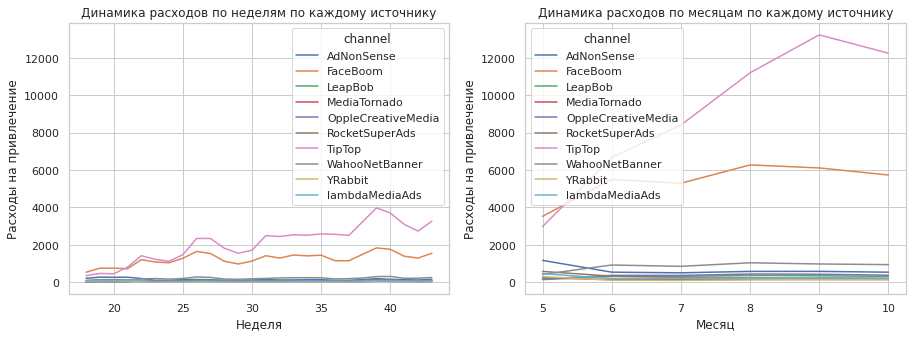

In [97]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
cost_week = costs.groupby(['channel', 'week'])['costs'].sum().reset_index()

sns.lineplot(x='week', y='costs', hue='channel', data=cost_week, ax=ax1)
sns.set_theme(style='whitegrid')
plt.title('Динамика расходов по неделям по каждому источнику')
plt.xlabel('Неделя')
plt.ylabel('Расходы на привлечение')

ax1 = plt.subplot(1, 2, 2, sharey=ax1)
cost_month = costs.groupby(['channel', 'month'])['costs'].sum().reset_index()

sns.lineplot(x='month', y='costs', hue='channel', data=cost_month, ax=ax1)
sns.set_theme(style='whitegrid')
plt.title('Динамика расходов по месяцам по каждому источнику')
plt.xlabel('Месяц')
plt.ylabel('Расходы на привлечение')

plt.show()

По графику видно, что затраты на каналы TipTop и FaceBoom увеличиваются со временем и в разрезе месяца расходы на рекламу значительно прирастают

Посчитаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, предварительно исключив источник organic, этот источник для компании бесплатный.

In [98]:
cac = (profiles.query('channel != "organic"')
               .pivot_table(index='channel', 
                            values='acquisition_cost',
                            aggfunc = 'mean',
                            margins=True)
               .rename(columns={'acquisition_cost': 'cac'})
               .sort_values(by='cac', ascending=False))
cac

,cac
channel,
TipTop,2.799003
All,1.127481
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975


В среднем, привлечение одного пользователя стоило компании 1.13 долларов. Наибольшая стоимость привлечения одного пользователя у рекламного канала TipTop	

**Вывод:** В сумме, затраты на рекламу обошлись компании в 105497 долларов. Наибольшее количество денег компания потратила на рекламные каналы TipTop и FaceBoom, по графику увидели, что траты на эти источники увеличиваются со временем. Самое дорогое привлечение пользователя приходится на канал TipTop и составляет 2.8 долларов на одного пользователя, а в среднем, без учета источника, компания тратит на привлечение одного пользователя 1.13 долларов

### Оценка окупаемости рекламы

Посмотрим на какие страны ориентируются рекламные каналы

In [99]:
profiles.pivot_table(index='channel',columns='region', values='user_id', aggfunc='count').fillna(0)

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,0.0
FaceBoom,0.0,0.0,0.0,29144.0
LeapBob,2988.0,2519.0,3046.0,0.0
MediaTornado,0.0,0.0,0.0,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,0.0
RocketSuperAds,0.0,0.0,0.0,4448.0
TipTop,0.0,0.0,0.0,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,0.0
YRabbit,0.0,0.0,0.0,4312.0


Видим, что FaceBoom, MediaTornado, RocketSuperAds, TipTop, YRabbit работают только на привлечение пользователей из США, остальные источники работают на привлечение из Германии, Великобритании и Франции

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI. Для расчета воспользуемся функцией get_ltv(), а для визуализации - plot_ltv_roi().

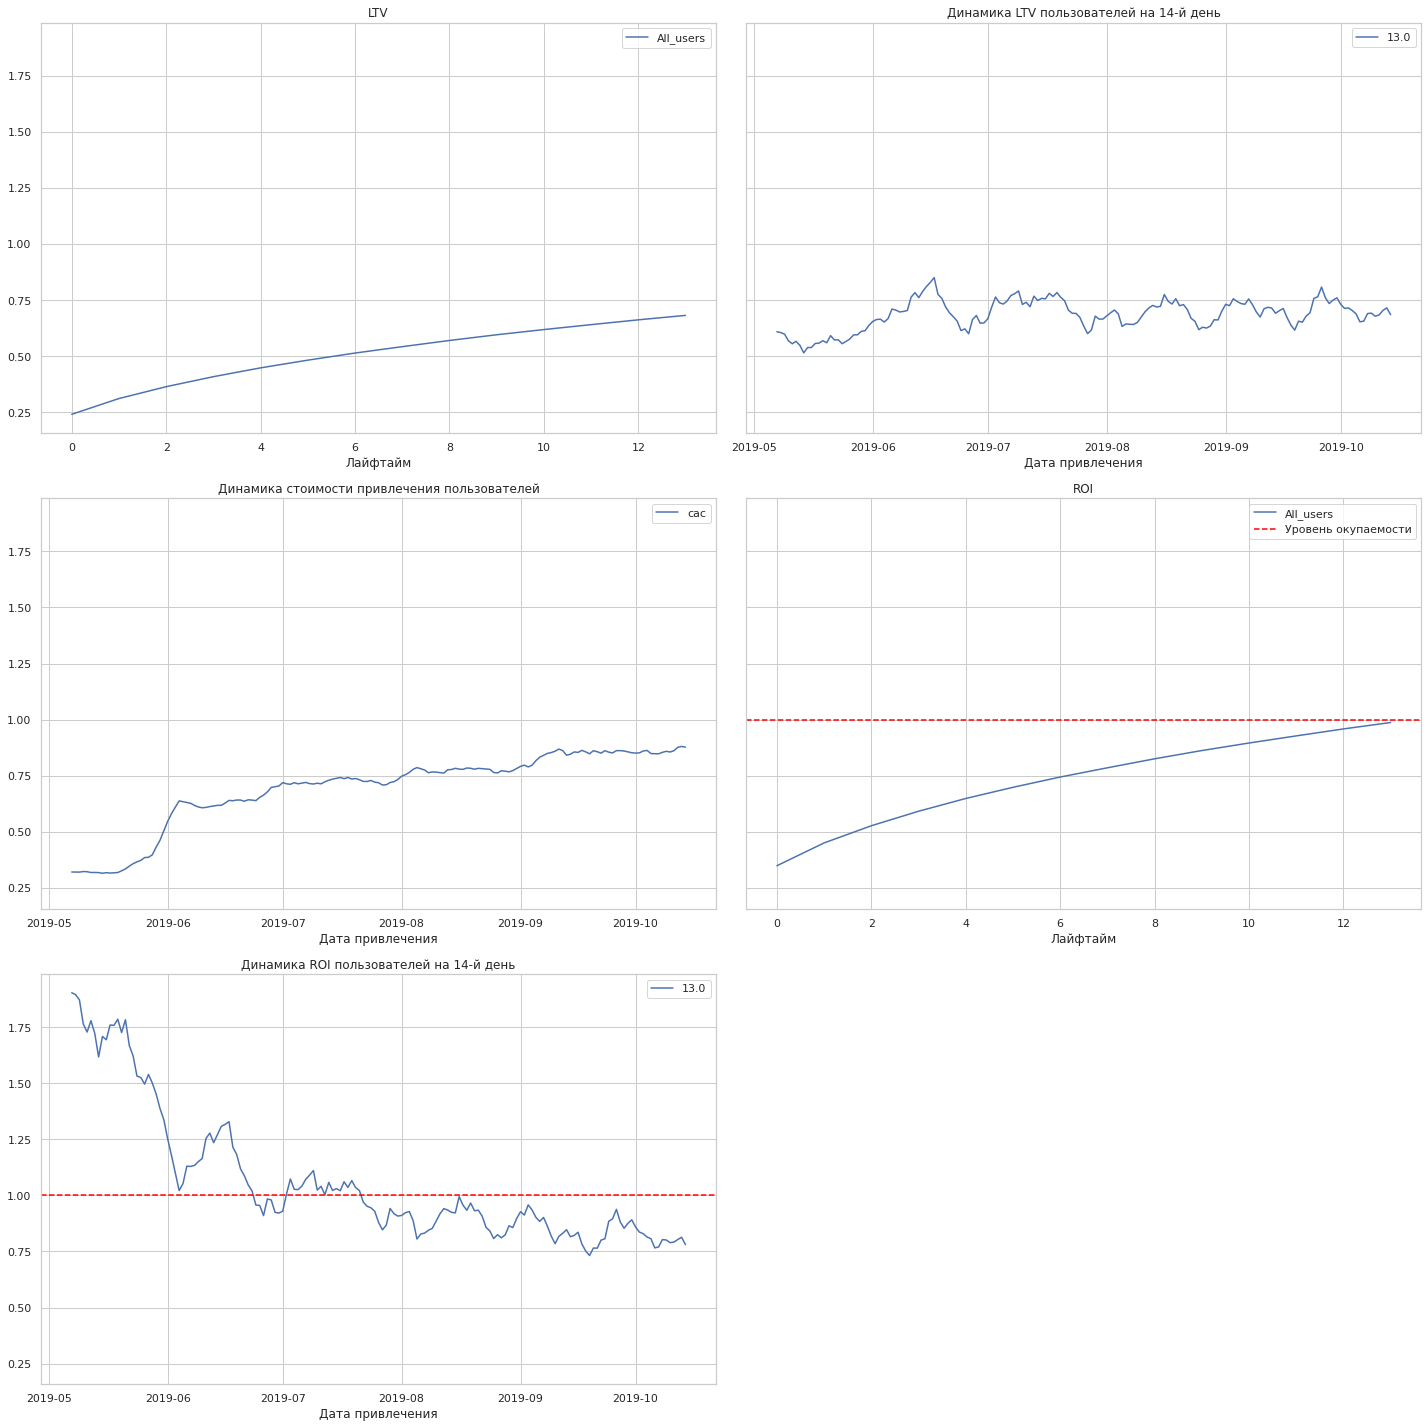

In [100]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles,orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Стоимость привлечения пользователей растет, это говорит о том, что траты на рекламу повышаются. Реклама не окупается, ROI в конце горизонта анализа едва превышает 80 %. В динамике ROI видим, что окупаемость инвестиций начала снижаться уже со второго месяца наблюдаемого периода. Пожизненная ценность клиента (LTV) хоть имеет влияние сезонного фактора, достаточно стабильна. Теперь посмотрим окупаемость рекламы в разбивке по устройствам, региону и каналу привлечения пользователей.

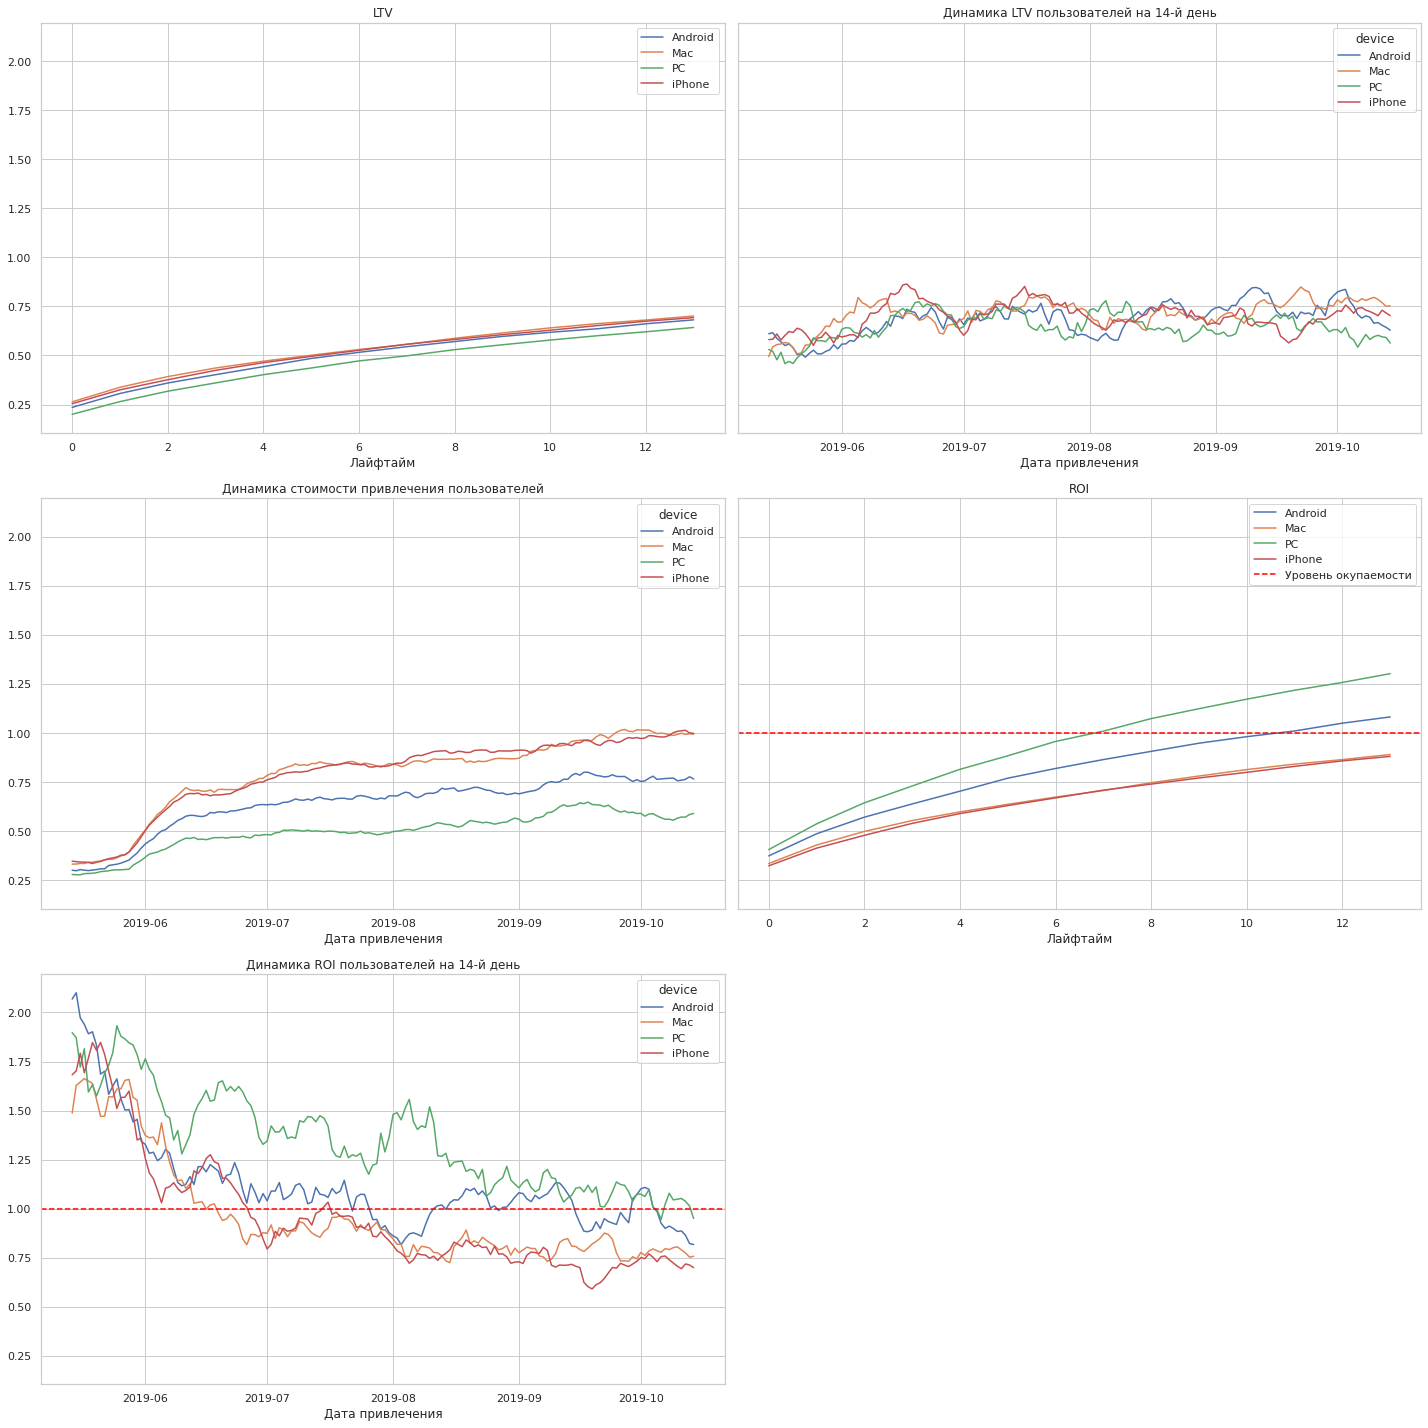

In [101]:
# окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, 
                                                                      horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Пожизненная ценность клиента достаточно стабильна на всех устройствах. Стоимость привлечения пользователей растет на всех устройствах, самое дорогое привлечение на Mac и iPhone. К окончанию горизонта анализа реклама окупилась только у пользователей PC

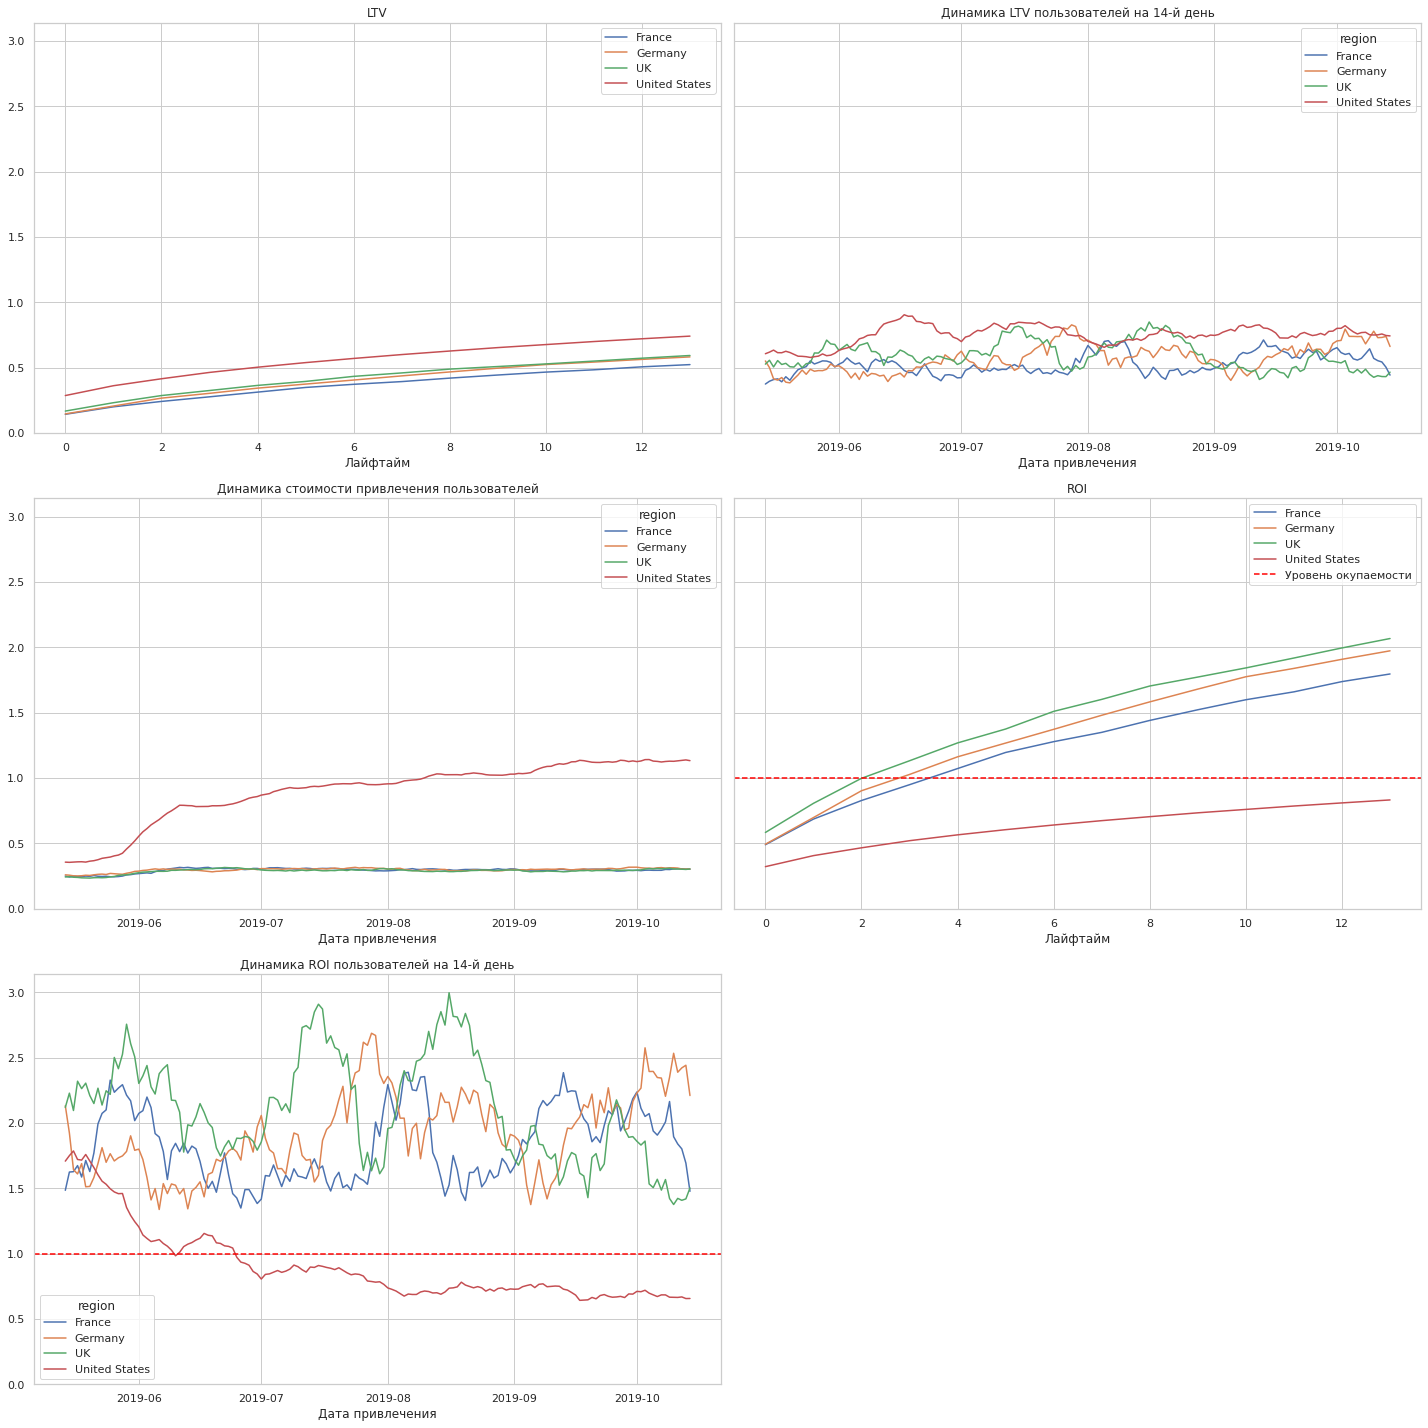

In [102]:
# окупаемость с разбивкой по регионам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date,
                                                                      horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Несмотря на самую высокую пожизненную ценность клиентов из США, на их привлечение компания тратит большего всего денег, и эти затраты единственные, которые не окупаются. Затраты на пользователей, привлеченных из других стран окупаются уже к концу первой недели

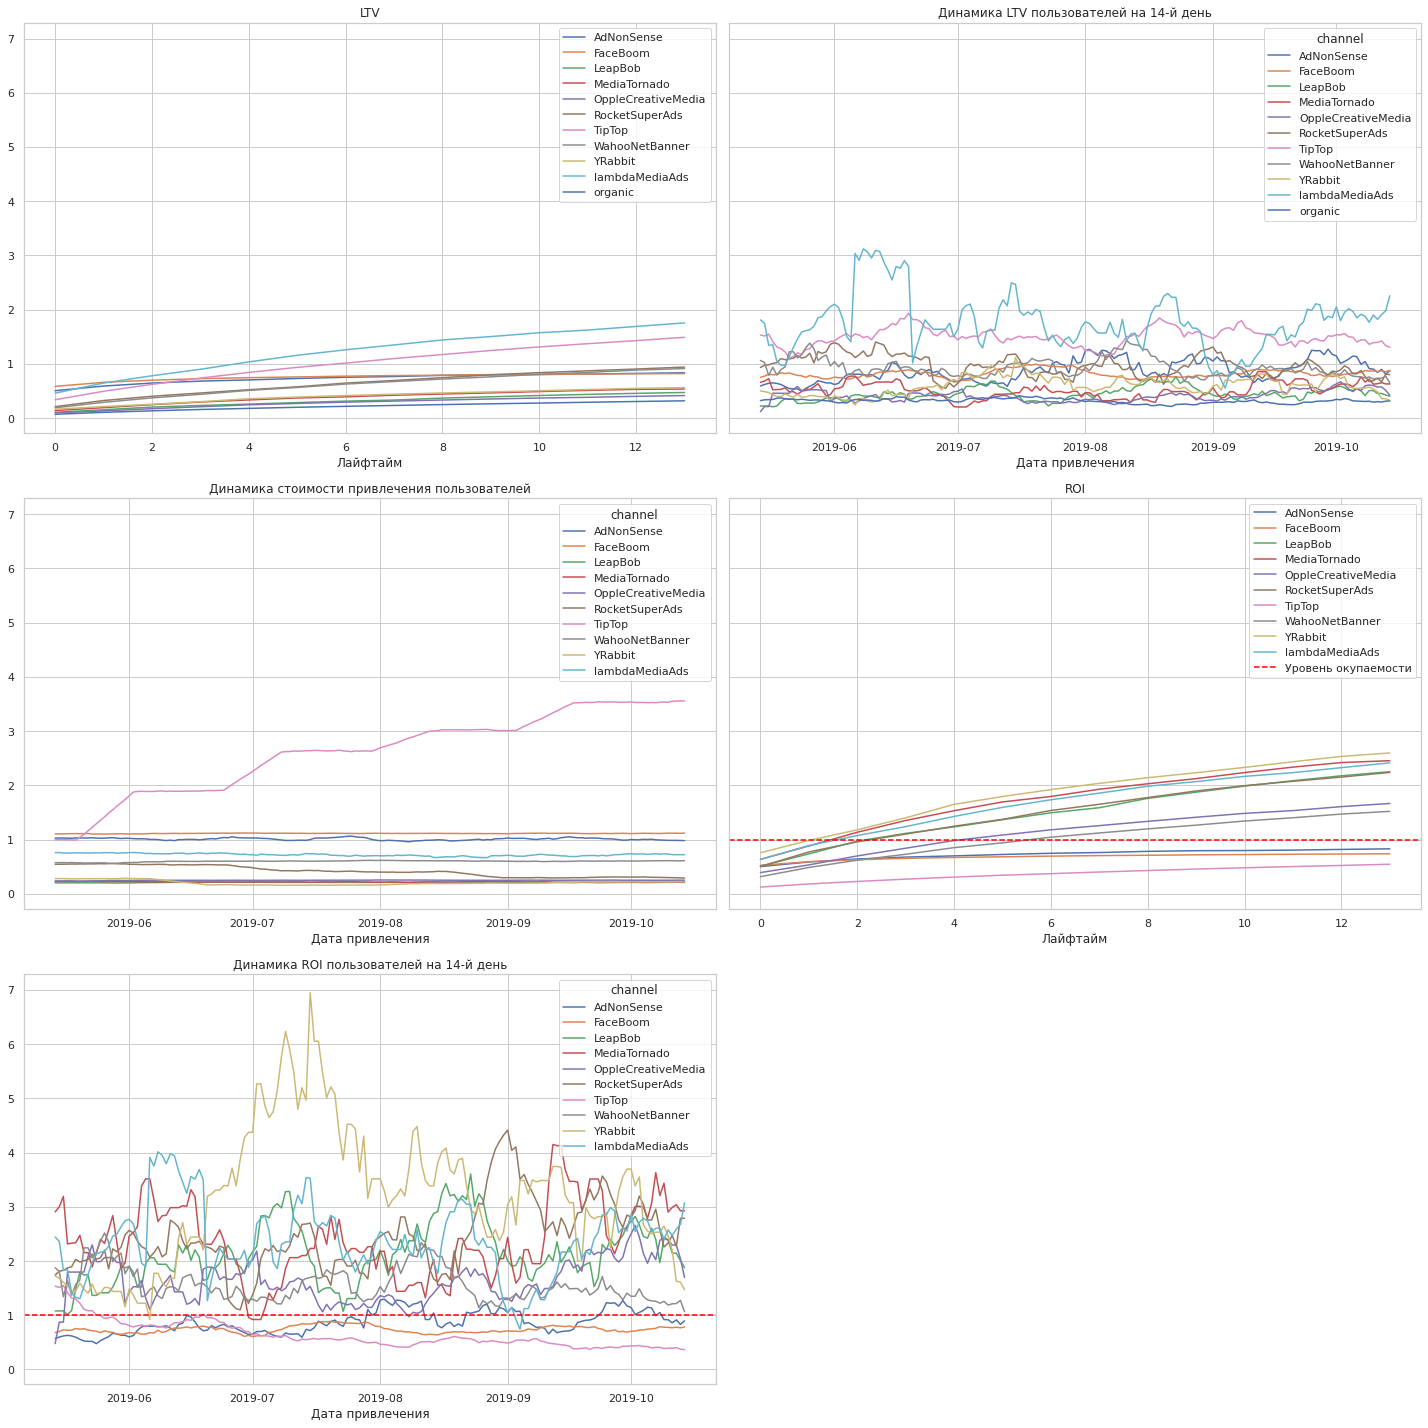

In [103]:
# окупаемость с разбивкой по каналам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, 
                                                                      horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Посмотрим непосредственно на рекламные каналы, работающие в США

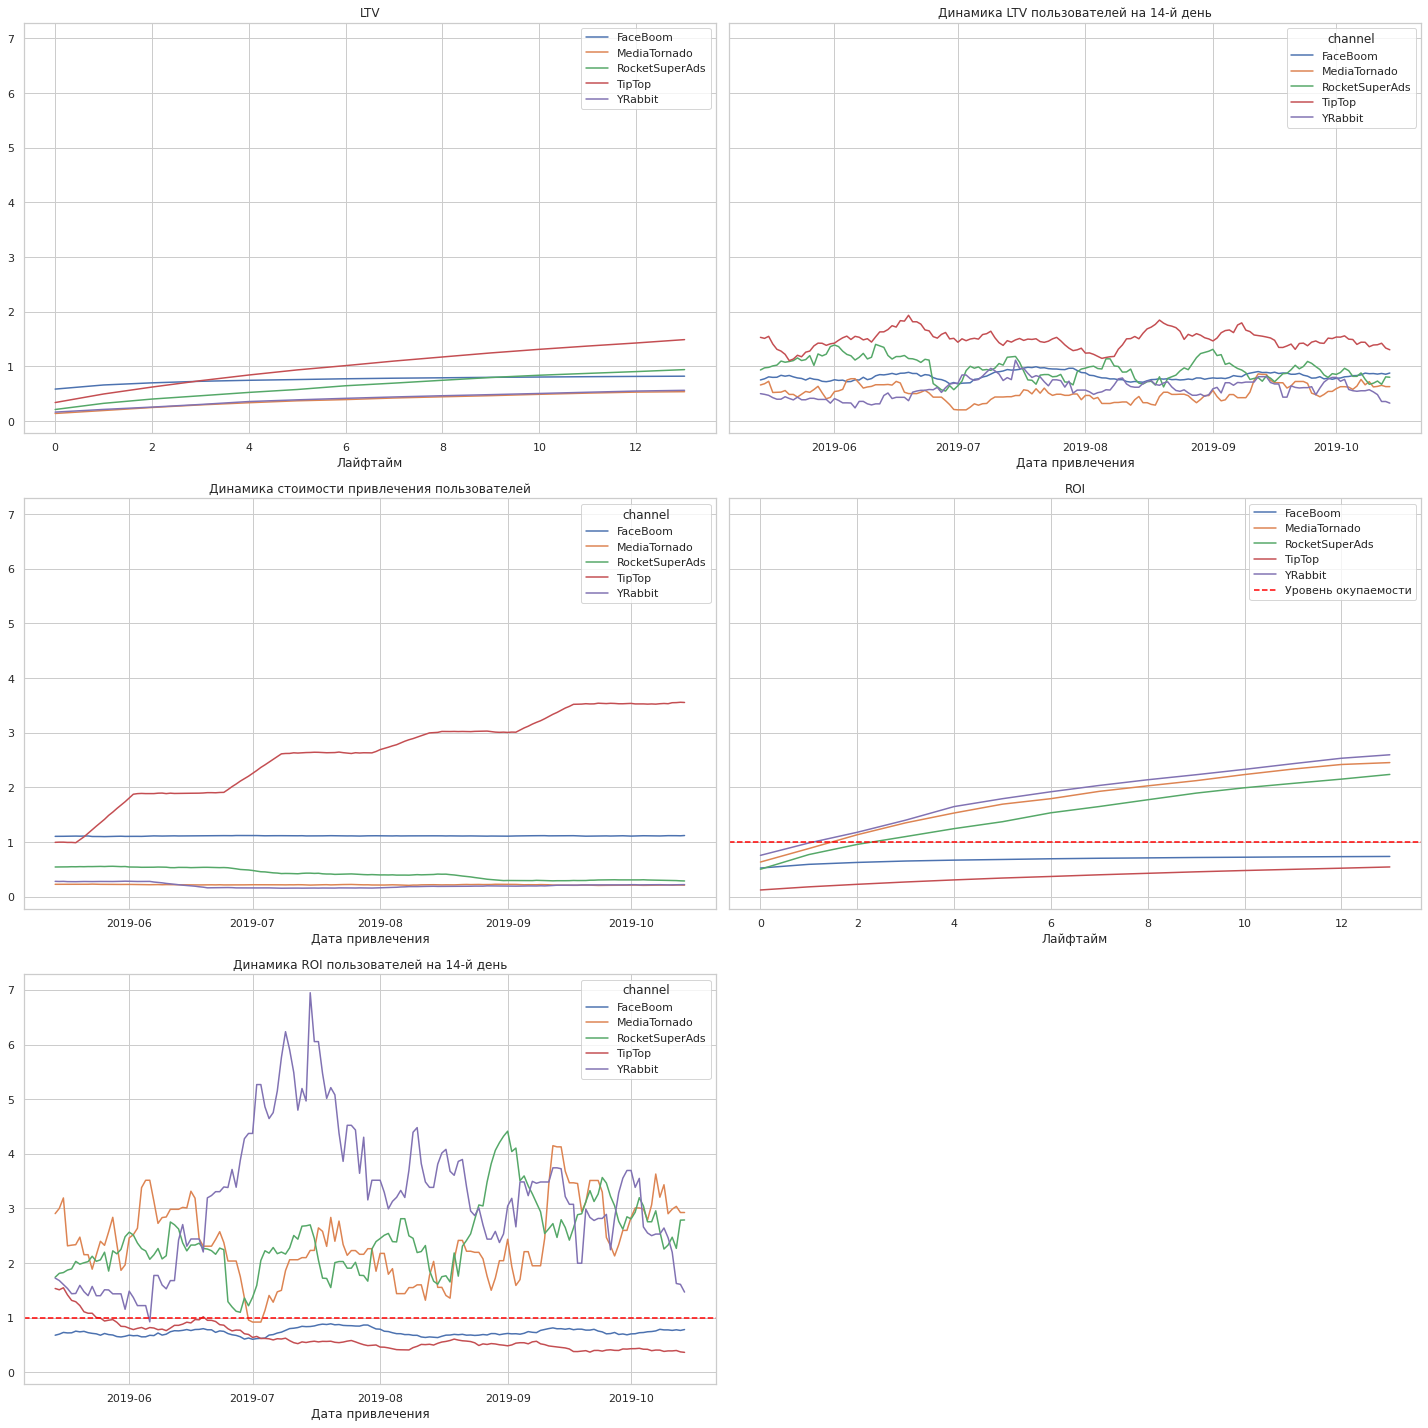

In [113]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region == "United States"'),
    orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

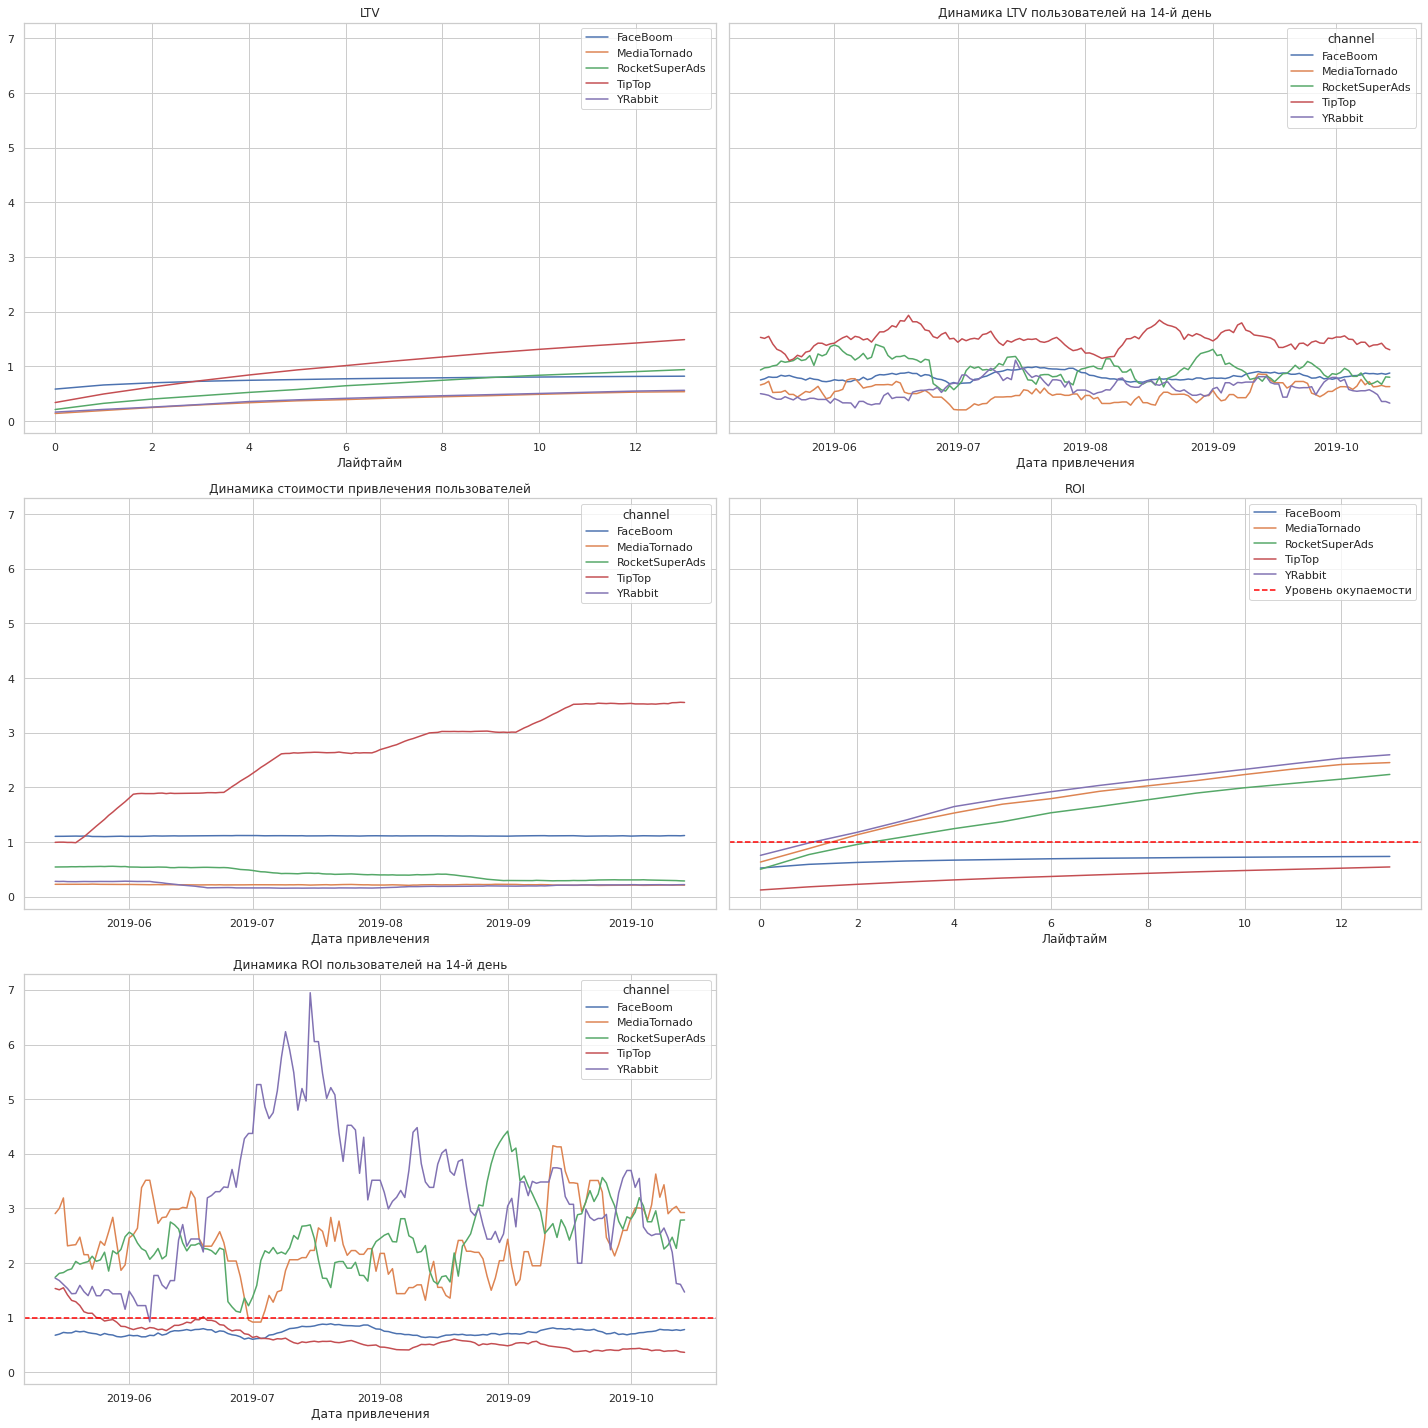

In [105]:
# окупаемость каналов в США
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel == ["FaceBoom", "MediaTornado", "RocketSuperAds",  "TipTop", "YRabbit"]'),
    orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Динамика стоимости привлечения пользователей достаточно стабильна по всем каналам, за исключением TipTop. График по этому каналу получился ступенчатым, это означает, что компания с каждым месяцем вкладывает в этот канал еще больше денег. Видим, что реклама по этому каналу не окупилась, наряду с FaceBoom и AdNonSense. Отметим канал LambdaMediaAds, пожизненная ценность привлеченных пользователей которого выше остальных каналов, стоимость привлечения клиентов по этому каналу невысокая и траты на рекламу окупились. YRabbit и MediaTornado также отличаются лучшей окупаемостью и более низкой стоимостью привлечения. В США окупаются 3 канала: MediaTornado, RocketSuperAds, YRabbit, а каналы, в которые вкладывали большую часть бюджета - не окупились. Кана

Построим графики конверсии и удержания пользователей с разбивкой по устройствам, регионам и каналам привлечения. Для расчета вызовем функции get_conversion и get_retention, для построения графиков - plot_retention и plot_conversion. Предварительно исключим из анализа бесплатный канал привлечения - organic, который может повлиять на конечные результаты

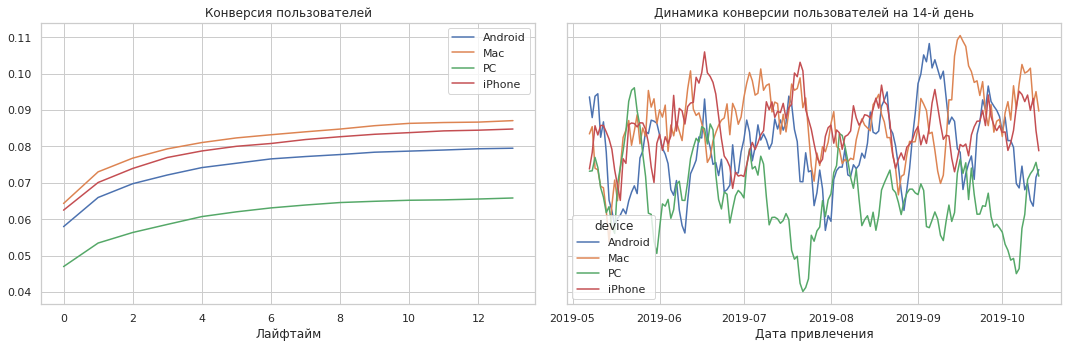

In [106]:
# конверсия пользователей с разбивкой по устройствам 
profiles = profiles.query('channel != "organic"')
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date,
                                                                        horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

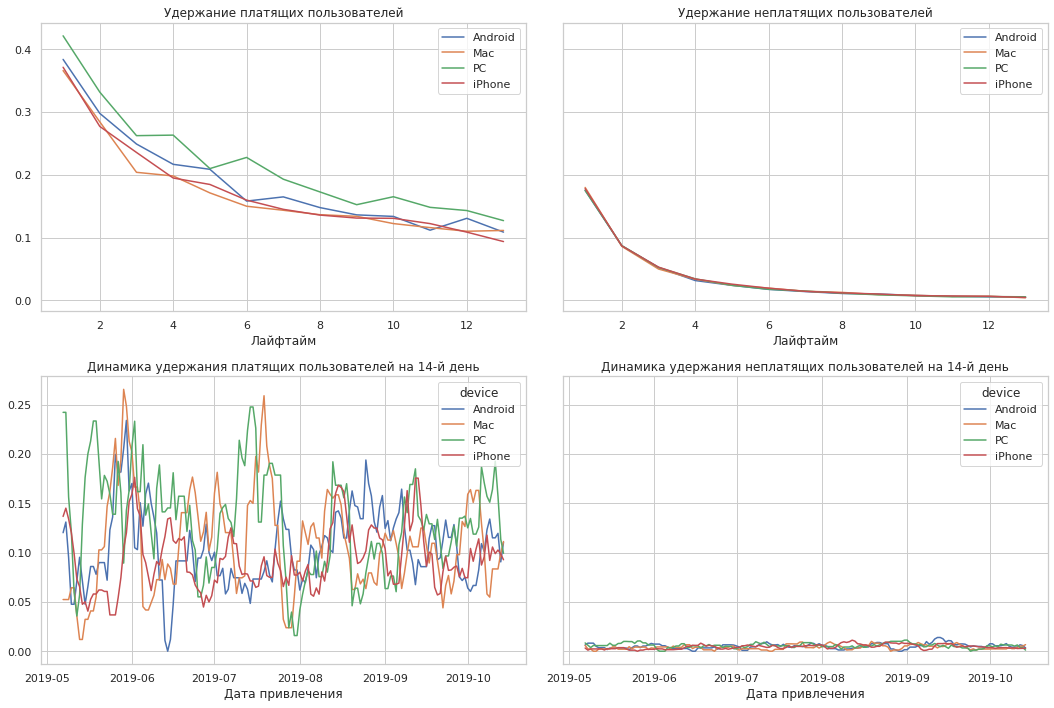

In [107]:
# удержание пользователей с разбивкой по устройствам 
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date,
                                                                    horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Лучше конвертируются пользователи, использующие Mac и iPhone, заметно отстает конверсия пользователей PC. Удержание пользователей на всех устройствах примерно одинаковое, чуть выше удержание платящих пользователей PC.  

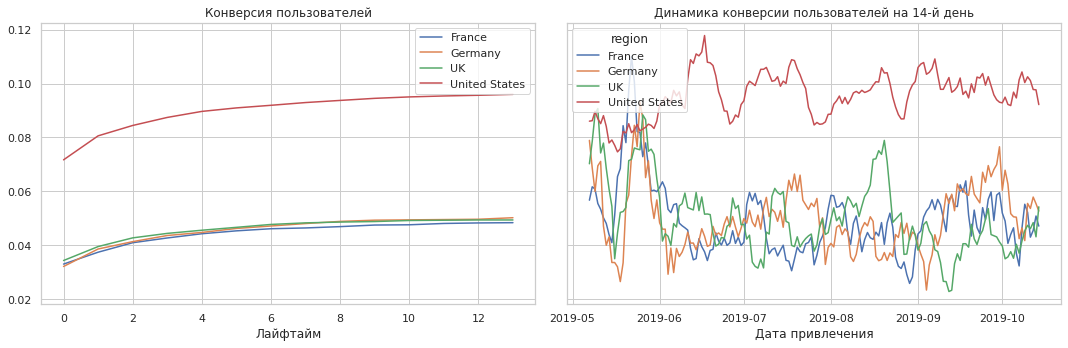

In [108]:
# конверсия пользователей с разбивкой по регионам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date,
                                                                        horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

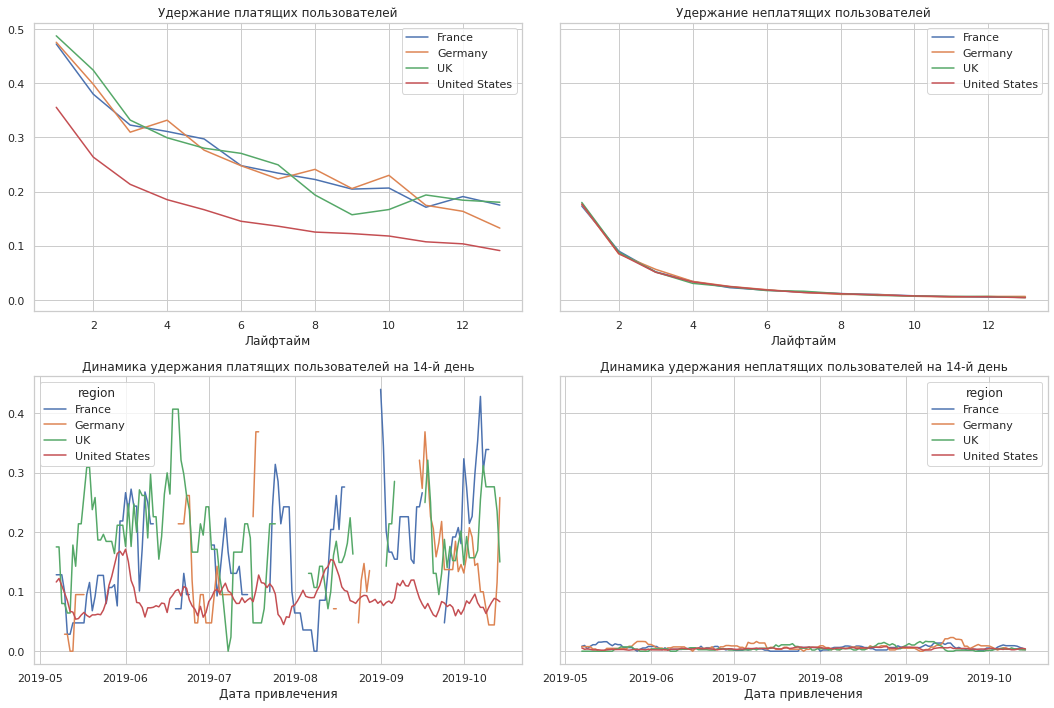

In [109]:
# удержание пользователей с разбивкой по регионам
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date,
                                                                    horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Конверсия пользователей из США заметно выше конверсии пользователей из других регионов, которые имеют примерно одинаковую конверсию. Удержание платящих пользователей из США меньше остальных регионов. Удержание не платящих пользователей стабильно для всех регионов

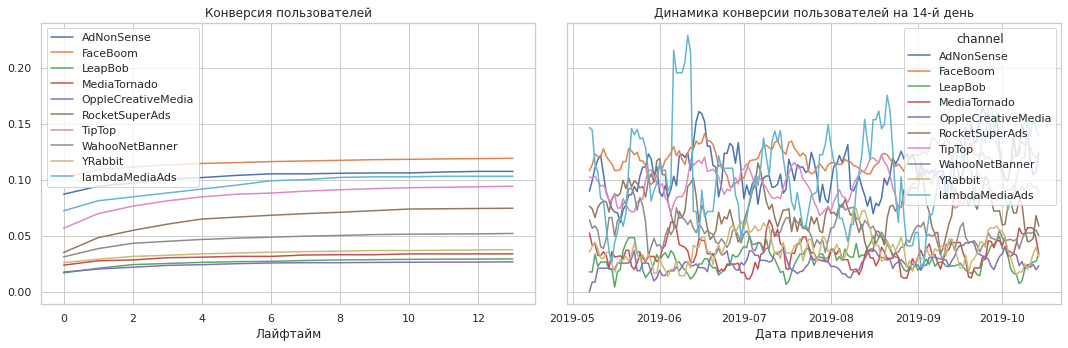

In [110]:
# конверсия пользователей с разбивкой по каналам привлечения
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date,
                                                                        horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

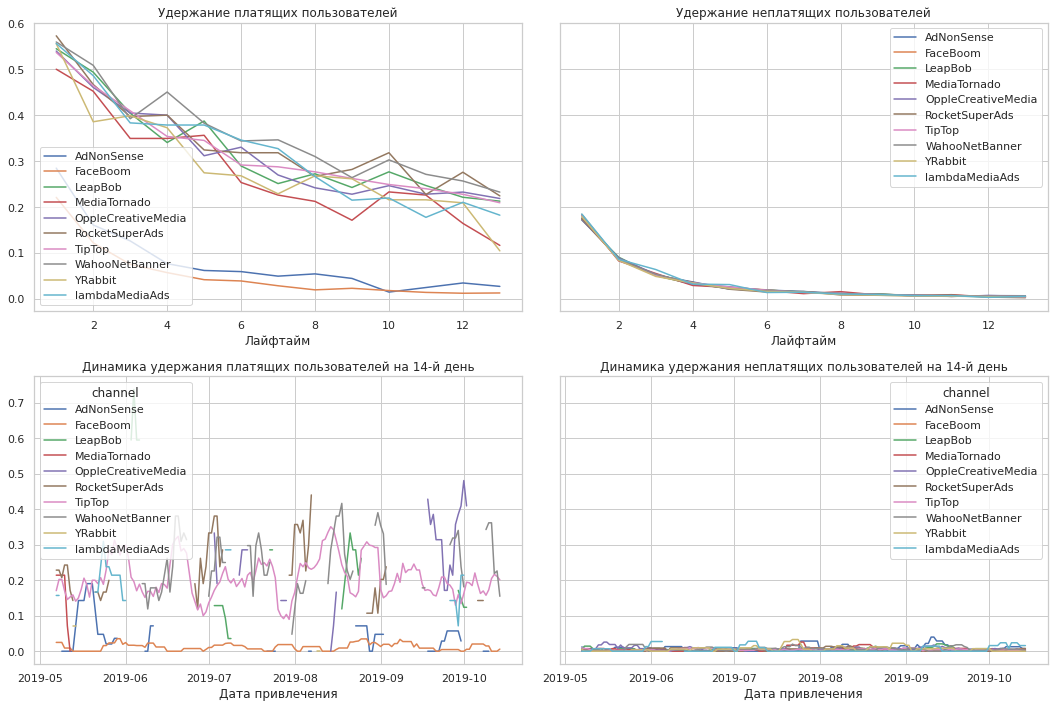

In [111]:
# удержание пользователей с разбивкой по каналам привлечения
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, 
                                                                    horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Наибольшая конверсия у пользователей, привлеченных из канала FaceBoom. Удержание платящих пользователей, привлеченных из канала FaceBoom и AdNonSense самое низкое. Удержание не платящих пользователей стабильно и почти не отличается от канала привлечения

**Вывод:** Можно сделать вывод о том, что в целом, реклама, направленная на привлечение пользователей не окупается, а с течением времени траты на нее только возрастают. Реклама окупилась лишь на 80%. Негативное влияние на окупаемость рекламы оказывают:
*	пользователи с устройствами Mac и iPhone, наряду с Android реклама на этих устройствах не окупается;
*	пользователи из США, которые имеют большую конверсию по сравнению с другими странами, имеют наименьшее удержание. Компания тратит огромные деньги на привлечение пользователей из этой страны, но она не окупается, и более того, имеет тенденцию к снижению этого показателя;
*	пользователи, привлеченные по каналам FaceBoom и AdNonSense, несмотря на высокую конверсию, имеют самое низкое удержание, реклама также не окупилась. Еще больше негативных последствий несет канал TipTop, который, помимо того, что не окупился, еще и вытягивает из компании огромные деньги.

Возможные причины проблем с окупаемостью рекламы:
*   акцент на привлечение пользователей из США, которые не приносят доход и не покрывают расходы на рекламу;
*	постоянное увеличение стоимости привлечения пользователей, тем самым реклама не успевает окупиться;
*	большая доля рекламного бюджета была распределена между двумя каналами TipTop и FaceBoom, что в совокупности составило более 82% и эти каналы работают только с привлечением пользователей из США.

Отделу маркетинга рекомендуется:
*	переключиться с рекламы в США на другие страны;
*   в США принимать меры по удержанию пользователей;
*	пересмотреть и перераспределить бюджет в первую очередь на рекламные источники, которые окупаются, и стоимость привлечения пользователей по которым не слишком высока, а это LambdaMediaAds, YRabbit и MediaTornado;
*	рассмотреть удобство использования устройства PC, в целях увеличения конверсии, т.к реклама здесь окупается.

### Выводы
Провели исследование предоставленных датасетов. Загрузили и подготовили данные для дальнейшего анализа, проверили на наличие дубликатов и пропусков, заменили названия колонок  и тип данных у колонок с датами.
Составили профили пользователей, установили минимальную (2019-05-01), максимальную (2019-10-27) даты привлечения пользователей и горизонт анализа 14 дней.

Приложение Procrastinate Pro+:
*	распространяется в трех странах: США, Великобритания, Германия и Франция. Большинство пользователей было привлечено из США, пользователей из остальных стран, в совокупности в 2 раза меньше. Доля платящих пользователей также преобладает в США;
*	поддерживается на четырех устройствах: iPhone, Mac, Android и PC. Наибольшей популярностью пользуется iPhone, но наибольшая доля платящих пользователей использует Mac 
*	помимо бесплатного канала привлечения пользователей, использует 10 рекламных источников, среди которых FaceBoom, AdNonSense, lambdaMediaAds привлекают наибольшую долю платящих пользователей, и в совокупности дают около 34 % привлечения. Большая часть пользователей пришла самостоятельно, но процент платящих из них крайне мал. В последующем анализе исключили этот источник
			
Маркетинговый анализ показал, что компания потратила на рекламу более 105 тысяч долларов. Почти весь бюджет(82%) ушел на финансирование рекламных каналов TipTop и FaceBoom. По графику увидели, что с каждой неделей расходы на эти каналы возрастали. Самое дорогое привлечение одного пользователя у канала TipTop и составляет 2.8 доллара. В среднем, привлечение одного пользователя обходиться компании в 1.13 долларов.

Оценка окупаемости рекламы показала, что реклама не окупается, на 14-й день ROI составило лишь около 80%. Так, определили, что:
*   реклама на устройствах Android, iPhone и Mac не окупается;
*   реклама на устрайствах PC окупаетя, но имеет низкую конверсию;
*   реклама в США не окупается, имеет высокую стомость привлечения и низкое удержание пользователей;
*   канал FaceBoom, AdNonSense имеют проблемы с удержанием, не окупаются;
*   по каналу TipTop наблюдается увеличение стоимости привлечения, реклама не окупается.

Среди основных причин, повлекших за собой проблемы с окупаемостью рекламы, можно выделить:
*	постоянное увеличение стоимости привлечения пользователей, тем самым реклама не успевает окупиться;
*	большая доля рекламного бюджета была распределена между двумя каналами TipTop и FaceBoom, что в совокупности составило более 82%;
*	акцент на привлечение пользователей из США, которые не приносят доход и не покрывают расходы на рекламу;
*	совпадение факторов страны и рекламного источника, то есть, большая часть рекламного бюджета была направлена на привлечение пользователей из США, из-за чего эти каналы и страна не окупились;
*	несмотря на окупаемость каналов с недорогим привлечением, они имеют низкую конверсию.

Рекомендации для отдела маркетинга:
*	использовать рекламный бюджет не только на США;
*	применить меры по удержанию пользователей в США, рассмотреть с чем сталкиваются пользователи, удобно ли использовать приложение
*	использовать другие источники для привлечения клиентов из США;
*	пересмотреть и перераспределить бюджет в первую очередь на рекламные источники, которые окупаются, и стоимость привлечения пользователей по которым не слишком высока. Для США это: YRabbit и MediaTornado, для Европы: LambdaMediaAds;
*	рассмотреть удобство использования устройства PC, в целях увеличения конверсии, т.к реклама здесь окупается
*   рассмотреть бесплатный источник привлечения пользователей и попробовать их конвертировать, путем создания привлекательных условий для новых пользователей, ввести систему скидок и промокодов;
*   подключать новых пользователей через реферальные программы и программу лояльности;
*   для удержания клиентов использовать напоминания в виде сообщений с подробным описанием преимуществ приложения;
*	для более детального поиска проблем предоставлять данные с техническими ошибками.